In [34]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

(222, 227, 3)
<class 'numpy.ndarray'>


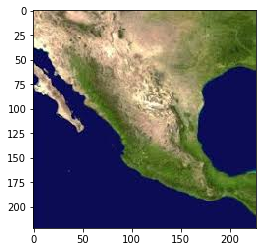

In [35]:
img = mpimg.imread('Mejico.png') 
print(img.shape)
print(type(img))
plt.imshow(img) 

In [36]:
bw_img = img.mean(axis=2)
print(bw_img.shape)
print(type(bw_img))
print(bw_img.max(), bw_img.min())
print(bw_img)

(222, 227)
<class 'numpy.ndarray'>
0.9921569 0.03137255
[[0.6313725  0.6392157  0.7633987  ... 0.25882354 0.25882354 0.25882354]
 [0.53333336 0.77647066 0.74379086 ... 0.28104576 0.28627452 0.28627452]
 [0.45751634 0.779085   0.6470589  ... 0.3124183  0.3124183  0.31633988]
 ...
 [0.12941177 0.12941177 0.13071896 ... 0.14379086 0.14379086 0.14379086]
 [0.12941177 0.12941177 0.13071896 ... 0.14379086 0.14379086 0.14640523]
 [0.12941177 0.12941177 0.13071896 ... 0.14379086 0.14640523 0.14640523]]


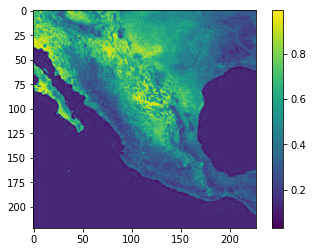

In [37]:
plt.imshow(bw_img)
plt.colorbar()

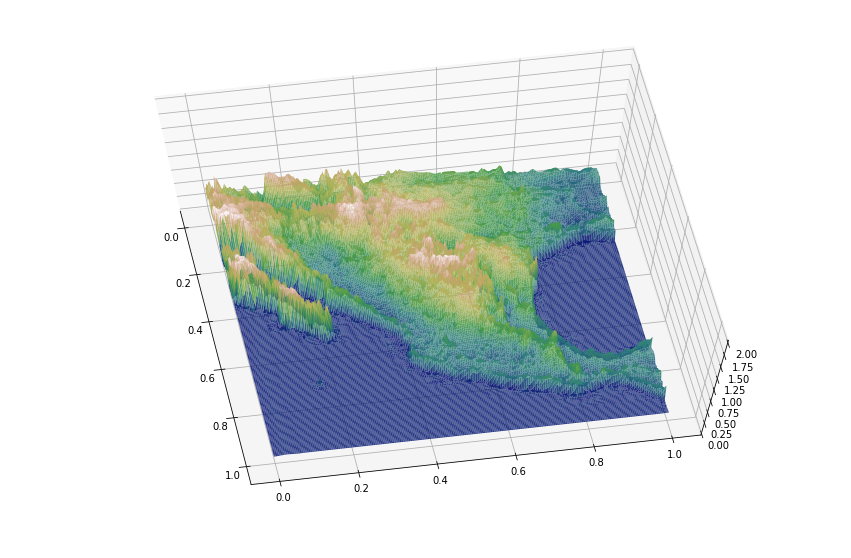

In [95]:
xg, yg = np.meshgrid(np.linspace(0,1,bw_img.shape[0]), 
                     np.linspace(0,1,bw_img.shape[1]))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

ax.plot_surface(xg, yg, bw_img.T, cmap=cm.gist_earth, 
                rstride=1, cstride=1,
                antialiased=True, alpha=0.90, shade=False)
ax.set_zlim(0,2)
ax.view_init(70,-10)

In [98]:
def applyFilter(M, F):
    A = np.zeros(M.shape)
    Nx = M.shape[0]
    Ny = M.shape[1]
    print(Nx, Ny)
    for j in range(1,Ny-2):
        for i in range(1,Nx-2):
            W = M[i-1:i+2,j-1:j+2]
            suma = 0
            for jj in range(3):
                for ii in range(3):
                    suma += W[ii,jj] * F[ii,jj]
            A[i,j] = suma
    return A

In [99]:
F = np.ones((3,3))
F *= (1/9)
print(F)
B = applyFilter(bw_img, F)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
222 227


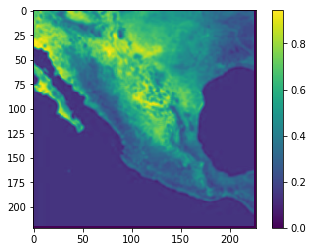

In [100]:
plt.imshow(B)
plt.colorbar()

222 227


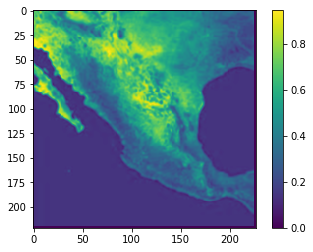

In [101]:
G = np.array([[1/16, 1/8, 1/16],[1/8,1/4,1/8],[1/16, 1/8, 1/16]])
B = applyFilter(bw_img, G)
plt.imshow(B)
plt.colorbar()

222 227


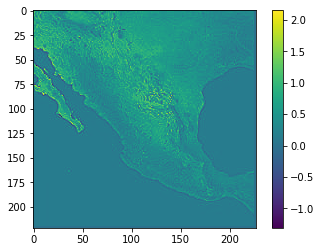

In [102]:
S = np.array([[0, -1, 0],[-1,5,-1],[0, -1, 0]])
B = applyFilter(bw_img, S)
plt.imshow(B)
plt.colorbar()

222 227


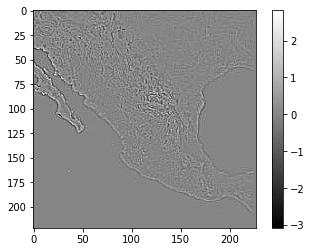

In [103]:
E = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
B = applyFilter(bw_img, E)
plt.imshow(B, cmap='gray', interpolation='nearest')
plt.colorbar()

222 227
222 227


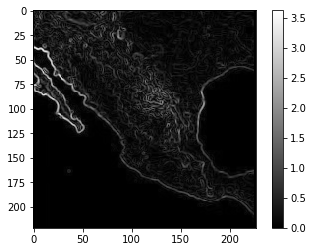

In [104]:
#EX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
#EY = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

EX = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
EY = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

BX = applyFilter(bw_img, EX)
BY = applyFilter(bw_img, EY)
B = np.sqrt((BX**2) + (BY**2))
#plt.imshow(B)
plt.imshow(B, cmap='gray', interpolation='nearest')
plt.colorbar()